# Demo of Web scraping, data and plotting in Python
---
## Features:

## - Python

## - Web Requests 

## - Beautiful Soup 

---

## General display settings

In [19]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## Python packages import

In [20]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import matplotlib
import requests

from bs4                       import BeautifulSoup as bs
from tqdm.auto                 import tqdm 

matplotlib.rc('font', **{'size' : 16})

## Web request from basketball-reference website

In [18]:
sUrl    = 'https://www.basketball-reference.com/players/h/hardeja01/gamelog/2016/'
oPage   = requests.get(sUrl)
# page
oSoup   = bs(oPage.content, 'html.parser')
print(oSoup.prettify())

<!DOCTYPE html>
<html class="no-js" data-root="/home/bbr/deploy/www" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
   <link href="https://d2p3bygnnzw9w3.cloudfront.net/req/202109021" rel="dns-prefetch"/>
   <!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
   <script async="true" type="text/javascript">
    (function() {
	var host = window.location.hostname;
	var element = document.createElement('script');
	var firstScript = document.getElementsByTagName('script')[0];
	var url = 'https://quantcast.mgr.consensu.org'
	    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, '/choice.js')
	var uspTries = 0;
	var uspTriesLimit = 3;
	element.async = true;
	element.type = 'text/javascript';
	element.src = url;
	
	firstScript.parentNode.insertBefore(element, first

## Build a python list from the HTML Data with the stats

In [13]:
stats                = ['game_season', 'date_game', 'team_id', 'game_location', 'opp_id', 'game_result', 'trb', 'ast', 'stl', 'blk', 'pf', 'pts', 'game_score', 'plus_minus']
stats_list           = [[td.getText() for td in oSoup.findAll('td', {'data-stat': stat})] for stat in stats]

dStats               = pd.DataFrame(stats_list).T
dStats.columns       = stats
dStats

,game_season,date_game,team_id,game_location,opp_id,game_result,trb,ast,stl,blk,pf,pts,game_score,plus_minus
0,1,2015-10-28,HOU,,DEN,L (-20),6,6,2,2,2,22,15.3,-20
1,2,2015-10-30,HOU,,GSW,L (-20),7,5,1,1,2,16,7.9,-22
2,3,2015-11-01,HOU,@,MIA,L (-20),6,7,3,1,2,16,10.1,-23
3,4,2015-11-02,HOU,,OKC,W (+5),5,3,3,2,1,37,28.4,+6
4,5,2015-11-04,HOU,,ORL,W (+5),7,4,0,0,5,28,10.5,+2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,2016-04-06,HOU,@,DAL,L (-2),5,4,1,2,4,26,12.5,-1
78,79,2016-04-07,HOU,,PHO,L (-9),2,7,2,0,3,30,26.7,-4
79,80,2016-04-10,HOU,,LAL,W (+20),4,13,4,0,2,40,33.0,+23
80,81,2016-04-11,HOU,@,MIN,W (+24),1,6,0,0,0,34,24.8,+29


## Display a plot chart of the points per game

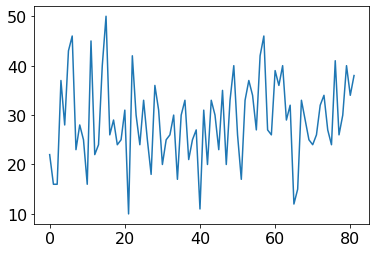

In [8]:
plt.plot(dStats['pts'].astype(float))

## a plot chart that looks better

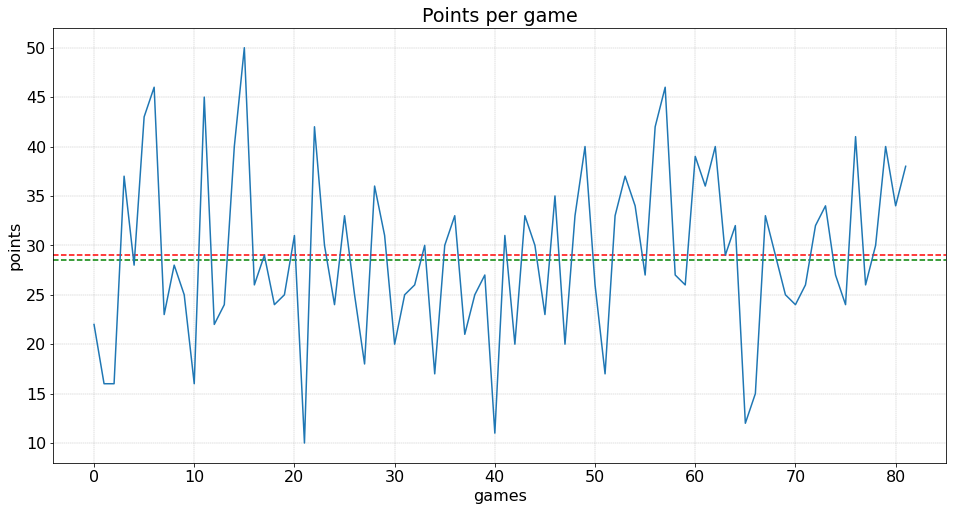

In [12]:
plt.figure (figsize=(16,8))
plt.title  ('Points per game')
plt.xlabel ('games')
plt.ylabel ('points')
plt.axhline(dStats['pts'].astype(float).mean()  , linestyle ="--", color ='red'  )
plt.axhline(dStats['pts'].astype(float).median(), linestyle ="--", color ='green')
plt.grid   (linestyle = '--', linewidth = 0.4)
plt.plot   (dStats['pts'].astype(float))


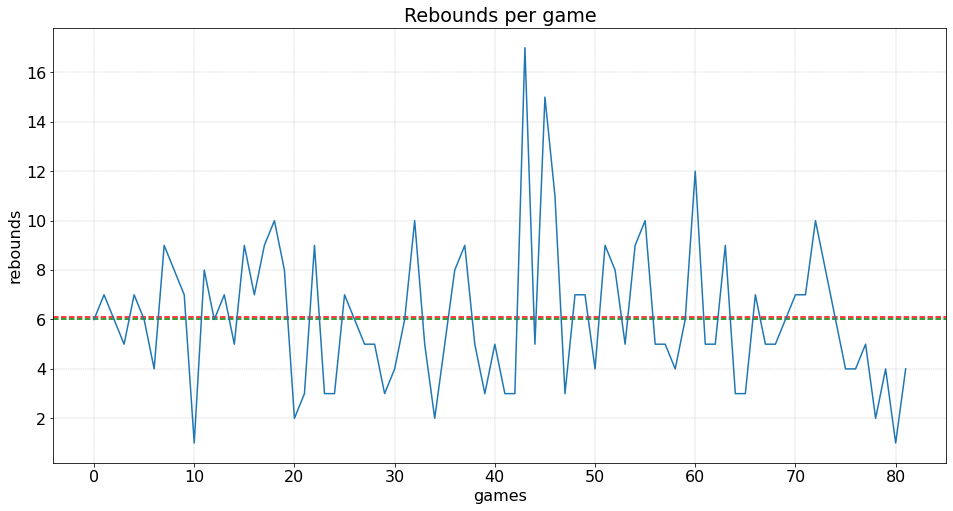

In [16]:
plt.figure (figsize=(16,8))
plt.title  ('Rebounds per game')
plt.xlabel ('games')
plt.ylabel ('rebounds')
plt.axhline(dStats['trb'].astype(float).mean()  , linestyle ="--", color ='red'  )
plt.axhline(dStats['trb'].astype(float).median(), linestyle ="--", color ='green')
plt.grid   (linestyle = '--', linewidth = 0.4)
plt.plot   (dStats['trb'].astype(float))


---
---
---

## Fix missing data on inactive game

In [39]:
stats_left           = [[td.getText() for td in oSoup.findAll('td', {'data-stat': stat})] for stat in stats[:7]]
stats_right          = [[td.getText() for td in oSoup.findAll('td', {'data-stat': stat})] for stat in stats[7:]]

df_left              = pd.DataFrame(stats_left).T
df_left.columns      = stats[:7]

for i in range(len(df_left)):
    if df_left['game_season'][i]=="":
        [stats_right[x].insert(i, '') for x in range(len(stats_right))]

df_right             = pd.DataFrame(stats_right).T
df_right.columns     = stats[7:]
dFullStat            = pd.concat([df_left, df_right], axis=1)

dFullStat


,game_season,date_game,team_id,game_location,opp_id,game_result,trb,ast,stl,blk,pf,pts,game_score,plus_minus
0,1,2015-10-28,HOU,,DEN,L (-20),6,6,2,2,2,22,15.3,-20
1,2,2015-10-30,HOU,,GSW,L (-20),7,5,1,1,2,16,7.9,-22
2,3,2015-11-01,HOU,@,MIA,L (-20),6,7,3,1,2,16,10.1,-23
3,4,2015-11-02,HOU,,OKC,W (+5),5,3,3,2,1,37,28.4,+6
4,5,2015-11-04,HOU,,ORL,W (+5),7,4,0,0,5,28,10.5,+2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,2016-04-06,HOU,@,DAL,L (-2),5,4,1,2,4,26,12.5,-1
78,79,2016-04-07,HOU,,PHO,L (-9),2,7,2,0,3,30,26.7,-4
79,80,2016-04-10,HOU,,LAL,W (+20),4,13,4,0,2,40,33.0,+23
80,81,2016-04-11,HOU,@,MIN,W (+24),1,6,0,0,0,34,24.8,+29


In [23]:
dActiveStats = dFullStat[dFullStat.game_season != '']

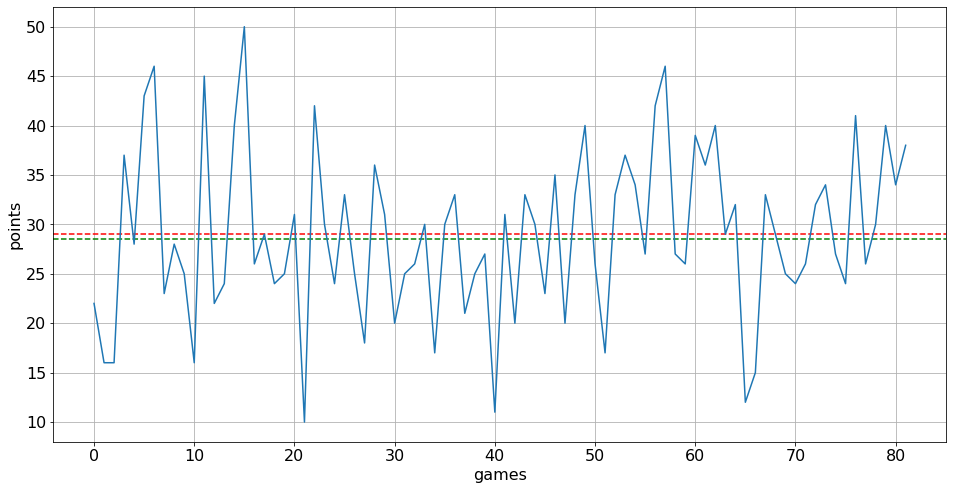

In [35]:
plt.figure(figsize=(16,8))
plt.xlabel('games')
plt.ylabel('points')
plt.axhline(dActiveStats['pts'].astype(float).mean(), linestyle ="--", color ='red')
plt.axhline(dActiveStats['pts'].astype(float).median(), linestyle ="--", color ='green')
# plt.axhline(dActiveStats['pts'].astype(float).mode(), linestyle ="--", color ='yellow')
# plt.legend()
plt.grid  ()
plt.plot  (dActiveStats['pts'].astype(float))


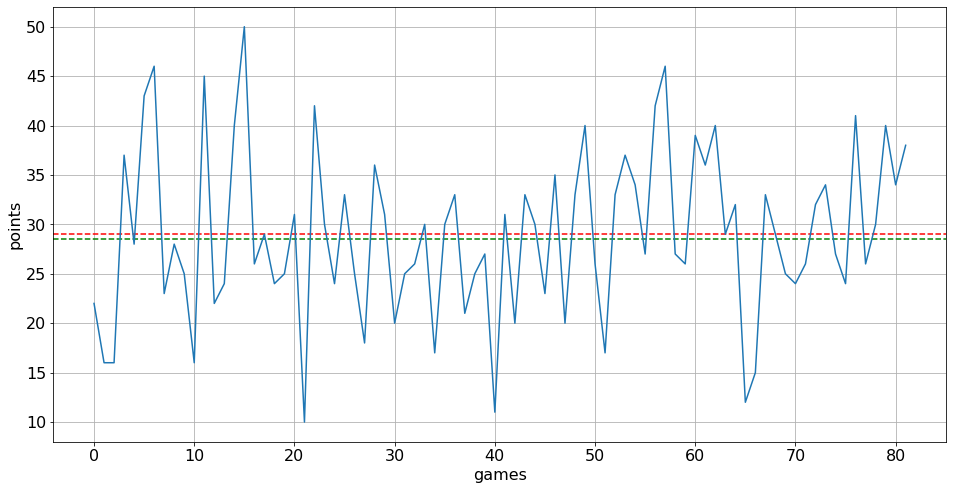

In [41]:
plt.figure(figsize=(16,8))
plt.xlabel('games')
plt.ylabel('points')
plt.axhline(dXX['pts'].astype(float).mean(), linestyle ="--", color ='red')
plt.axhline(dXX['pts'].astype(float).median(), linestyle ="--", color ='green')
# plt.axhline(dActiveStats['pts'].astype(float).mode(), linestyle ="--", color ='yellow')
# plt.legend()
plt.grid  ()
plt.plot  (dActiveStats['pts'].astype(float))


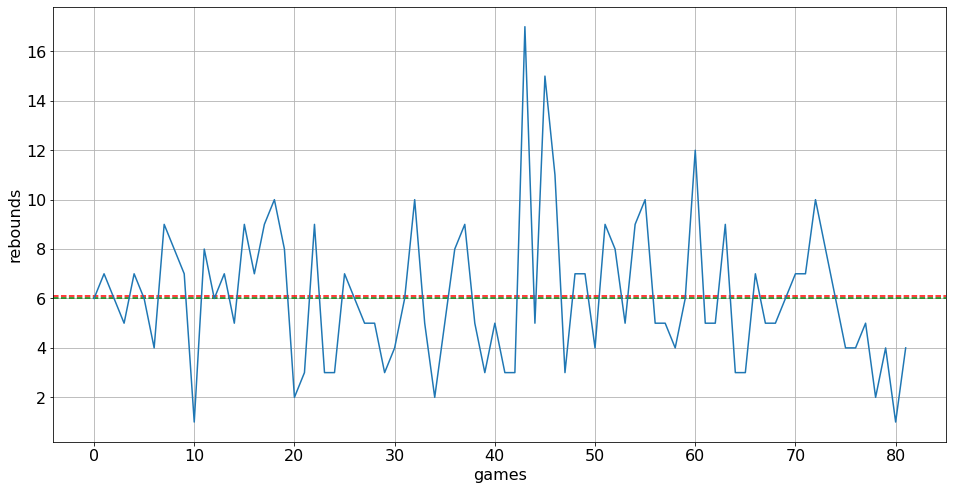

In [36]:
plt.figure(figsize=(16,8))
plt.xlabel('games')
plt.ylabel('rebounds')
plt.axhline(dActiveStats['trb'].astype(float).mean(), linestyle ="--", color ='red')
plt.axhline(dActiveStats['trb'].astype(float).median(), linestyle ="--", color ='green')

# plt.legend()
plt.grid  ()
plt.plot  (dActiveStats['trb'].astype(float))


In [25]:
stats_left  = [[td.getText() for td in soup.findAll('td', {'data-stat': stat})] for stat in stats[:7]]
stats_right = [[td.getText() for td in soup.findAll('td', {'data-stat': stat})] for stat in stats[7:]]

df_left = pd.DataFrame(stats_left).T
df_left.columns = stats[:7]
df_left.head(5)

for i in range(len(df_left)):
    if df_left['game_season'][i]=="":
        [stats_right[x].insert(i, '') for x in range(len(stats_right))]

df_right = pd.DataFrame(stats_right).T
df_right.columns = stats[7:]
df = pd.concat([df_left, df_right], axis=1)        


In [26]:
# df[df.game_season!='']['pts'].astype(int).mean().round(1)
df[df.game_season!='']['pts'].astype(float).mean()

24.613636363636363

In [28]:
df[df.game_season!='']['pts'].astype(float)

0     44.0
1     34.0
2     33.0
4     21.0
5     15.0
6     15.0
7     20.0
8     16.0
9     32.0
10    34.0
11    21.0
12    19.0
13    12.0
14    20.0
15    31.0
16    25.0
18    23.0
19    17.0
20    26.0
21    24.0
22    19.0
23    19.0
24    29.0
25    38.0
26    23.0
27    37.0
28    29.0
29    20.0
30    29.0
31    30.0
32    29.0
33    22.0
34    24.0
35    21.0
36    40.0
37    19.0
38    26.0
39    25.0
41    44.0
42    38.0
43    17.0
46     0.0
65    18.0
66     5.0
Name: pts, dtype: float64

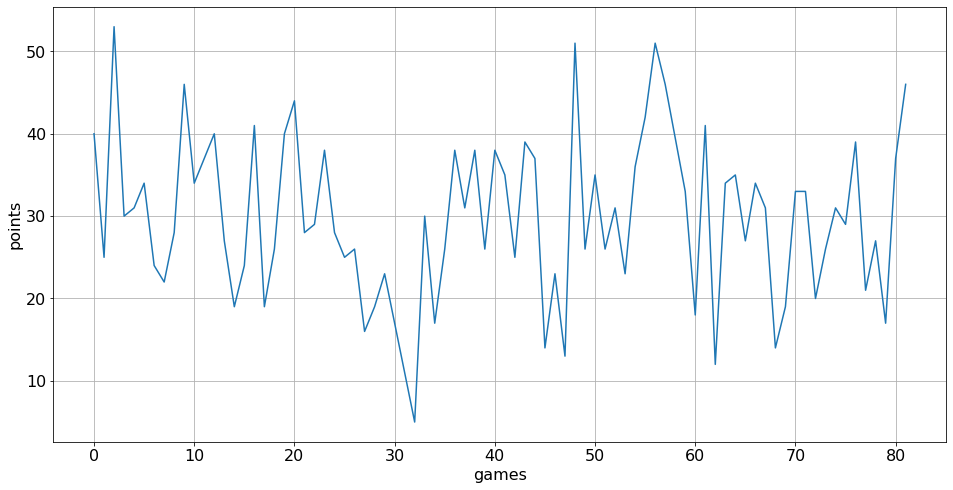

In [16]:
dPlayerStats = get_player_season(name='curryst01', year=2016)

plt.figure(figsize=(16,8))
plt.xlabel('games')
plt.ylabel('points')
# plt.legend()
plt.grid  ()
plt.plot  (dPlayerStats[dPlayerStats.game_season != '']['pts'].astype(float))


In [15]:
def get_player_season(name='curryst' ,year=2019):
    # access bball reference web site
    url = f'https://www.basketball-reference.com/players/{name[0]}/{name}/gamelog/{year}/'
    page = requests.get(url)
    soup = bs(page.content, 'html.parser')

    # pick stats
    stats = ['game_season', 'date_game', 'age', 'team_id', 'game_location', 'opp_id', 'game_result','gs', 'mp', 'fg',
    'fga', 'fg_pct', 'fg3', 'fg3a', 'fg3_pct', 'ft', 'fta', 'ft_pct', 'orb','drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'game_score', 'plus_minus']

    stats_list = [[td.getText() for td in soup.findAll('td', {'data-stat': stat})] for stat in stats]

    # fix missing data on inactive games
    stats_left  = [[td.getText() for td in soup.findAll('td', {'data-stat': stat})] for stat in stats[:7]]
    stats_right = [[td.getText() for td in soup.findAll('td', {'data-stat': stat})] for stat in stats[7:]]

    df_left = pd.DataFrame(stats_left).T
    df_left.columns = stats[:7]

    for i in range(len(df_left)):
        if df_left['game_season'][i]=="":
            [stats_right[x].insert(i, '') for x in range(len(stats_right))]

    df_right = pd.DataFrame(stats_right).T
    df_right.columns = stats[7:]
    dFullStat = pd.concat([df_left, df_right], axis=1)        
    return dFullStat
